In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [68]:
fitch = ["Pclass", "Sex", "SibSp", "Parch"] #chosse this fitches cause they wahe best coor score whith survive or not

X = pd.get_dummies(df[fitch]) #Scaler data 

y = df['Survived']

In [103]:
from sklearn.model_selection import train_test_split #split_data_to_validate
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state= 42 , test_size=0.26)

In [104]:
from sklearn.tree import DecisionTreeClassifier #choose DecisionTree to clasify 
clf_tree = DecisionTreeClassifier()

In [105]:
from sklearn.model_selection import GridSearchCV #to find the best hiperparameters use GridSearchCV
param_grid = {
    'criterion' : ['gini' , 'entropy'], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


best_model_tree = grid_search.best_estimator_


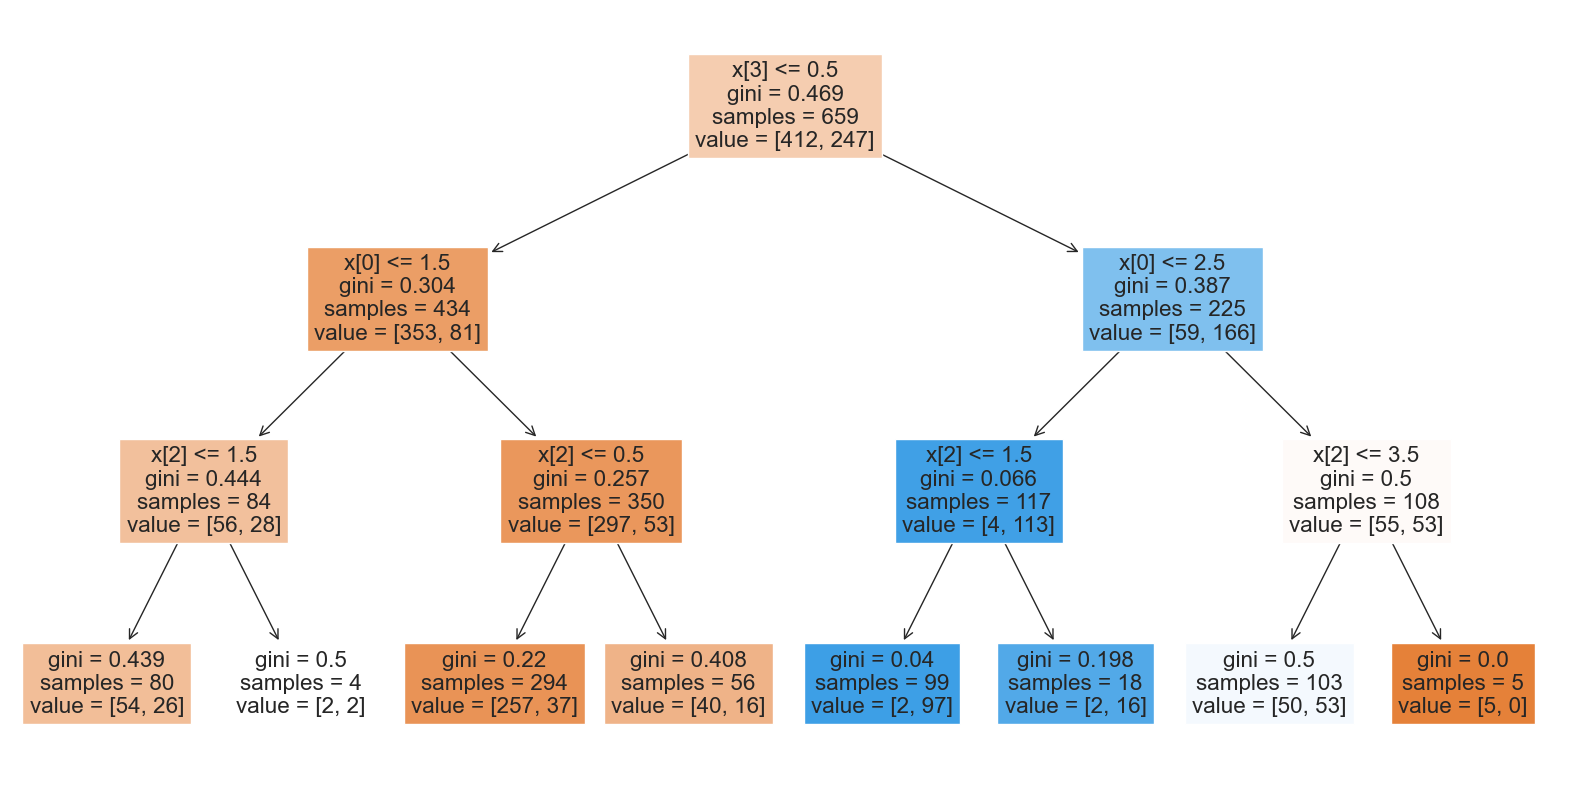

In [106]:
from sklearn.tree import plot_tree #build the tree to see how it work  and monitor underfitting
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))
plot_tree(best_model_tree, filled=True, feature_names=None)
plt.show()

In [107]:
from sklearn.model_selection import  cross_val_score  #make a CrossValidation to validate model
from sklearn.metrics import make_scorer, accuracy_score
accuracy_scorer = make_scorer(accuracy_score)

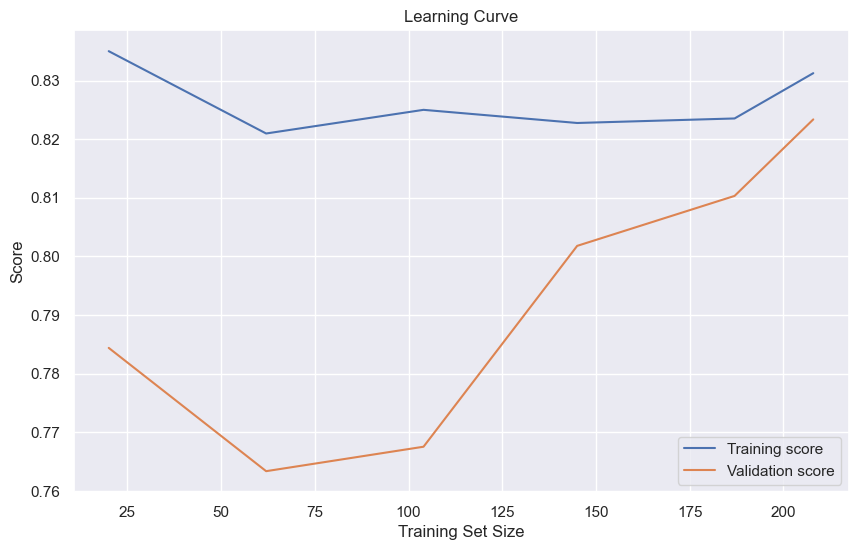

In [108]:
from sklearn.model_selection import learning_curve # build learning_curve to see how model works and make a clasify of with type my model
train_sizes, train_scores, validation_scores = learning_curve(
    best_model_tree, X_test, y_test, scoring= accuracy_scorer ,train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9 , 1], cv=10)





plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(validation_scores, axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [75]:
best_params

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

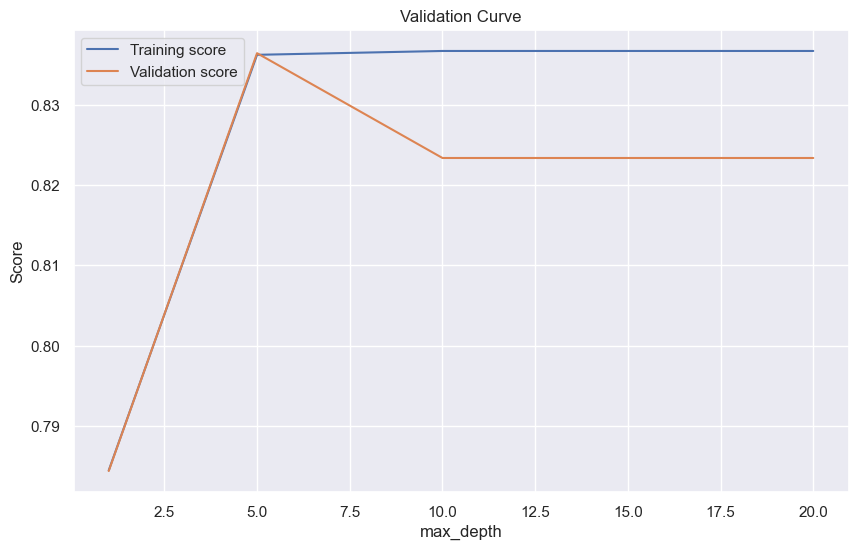

In [109]:
from sklearn.model_selection import validation_curve 
 
#build validation_curve to find best param of max_depth cause think its a main param of my model


train_scores, validation_scores = validation_curve(
    best_model_tree, X_test, y_test, param_name='max_depth', param_range=[1, 5, 10, 20], cv=10)


plt.figure(figsize=(10, 6))
plt.plot([1, 5, 10, 20], np.mean(train_scores, axis=1), label='Training score')
plt.plot([1, 5, 10, 20], np.mean(validation_scores, axis=1), label='Validation score')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()


In [113]:
best_params #saw a cool fith that GridSearchCV give bet param of max_depth = 3 but validation_curve show how inprive model 

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [110]:
from sklearn.metrics import f1_score, classification_report #chek f1 score to see result of prediction
print(classification_report(y_test ,best_model_tree.predict(X_test) ))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       137
           1       0.76      0.69      0.73        95

    accuracy                           0.78       232
   macro avg       0.78      0.77      0.77       232
weighted avg       0.78      0.78      0.78       232



In [112]:
from sklearn.metrics import f1_score, classification_report
print(classification_report(y_train ,best_model_tree.predict(X_train) ))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       412
           1       0.75      0.67      0.71       247

    accuracy                           0.80       659
   macro avg       0.79      0.77      0.78       659
weighted avg       0.79      0.80      0.79       659



In [119]:
tree_clf_final = DecisionTreeClassifier(criterion= 'gini' , max_depth= 5 , min_samples_split= 4 , min_samples_leaf= 4)
tree_clf_final.fit(X_train , y_train) #rebuil my model with new hiperparams to inprove f1 score 

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4)

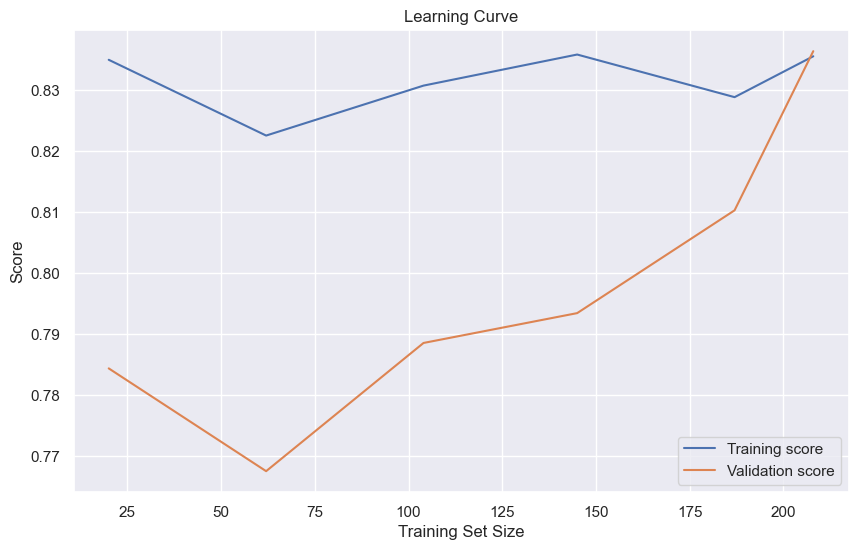

In [120]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
    tree_clf_final, X_test, y_test, scoring= accuracy_scorer ,train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9 , 1], cv=10)





plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(validation_scores, axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

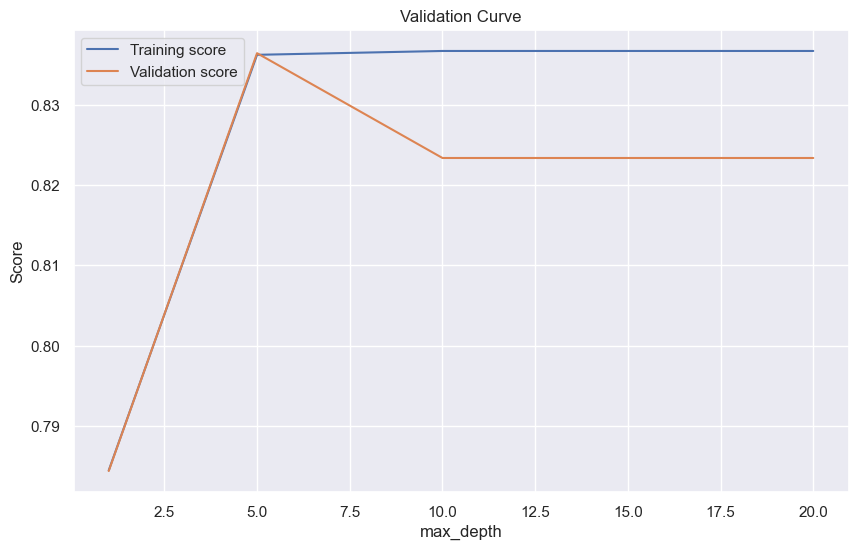

In [121]:
from sklearn.model_selection import validation_curve



train_scores, validation_scores = validation_curve(
    tree_clf_final, X_test, y_test, param_name='max_depth', param_range=[1, 5, 10, 20], cv=10)


plt.figure(figsize=(10, 6))
plt.plot([1, 5, 10, 20], np.mean(train_scores, axis=1), label='Training score')
plt.plot([1, 5, 10, 20], np.mean(validation_scores, axis=1), label='Validation score')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()


In [122]:
from sklearn.metrics import f1_score, classification_report
print(classification_report(y_train ,tree_clf_final.predict(X_train) ))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       412
           1       0.84      0.60      0.70       247

    accuracy                           0.81       659
   macro avg       0.82      0.77      0.78       659
weighted avg       0.81      0.81      0.80       659



In [123]:
from sklearn.metrics import f1_score, classification_report
print(classification_report(y_test ,tree_clf_final.predict(X_test) ))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       137
           1       0.85      0.63      0.72        95

    accuracy                           0.80       232
   macro avg       0.81      0.78      0.78       232
weighted avg       0.81      0.80      0.80       232



In [124]:
accuracy = accuracy_score(y_test, tree_clf_final.predict(X_test))
print("Accuracy:", accuracy)

Accuracy: 0.8017241379310345


In [126]:
df_test = pd.get_dummies(df_test[fitch])

In [127]:
predictions = tree_clf_final.predict(df_test)

In [128]:
test_data = pd.read_csv('test.csv')

In [129]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions}) # finaly make a prediction on test set and save file
output.to_csv('submission1.csv', index=False)
print("Your submission was successfully1 saved!")

Your submission was successfully1 saved!


In [132]:
true_info = pd.read_csv('gender_submission.csv')
my_predictons = pd.read_csv('submission1.csv')

result = true_info['Survived'] == my_predictons['Survived']
result.value_counts()

#compare my results of predition with real test result and have a not bdt result

Survived
True     391
False     27
Name: count, dtype: int64

Я перероблював цю модель приблизно 4-5 разів бо в ході розробки дізнавався стільки всього для себе новго та не зрозумілого . у сухому остатку дізнгався те , що реально я знаю та розумію ну дуже мало 